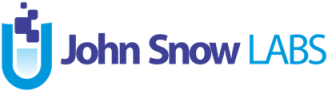

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/misc/HuggingFace_Dataset_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install langtest[transformers]

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [2]:
#Import Harness from the LangTest library
from langtest import Harness

# HuggingFace Datasets Testing For `text-classification`

In this section, we dive into testing of HuggingFace Models for different HuggingFace Datasets.

## Glue - `sst2` Dataset Testing
-------------------

The provided code initializes an instance of the Harness class, which is designed to handle text classification tasks using Hugging Face. The Harness class accepts a data parameter, which can be specified as a `dictionary` with several attributes.

The `data` prameter takes a dictionary which contains the following attributes:

```python
{
   "data_source": "",
   "subset": "",
   "feature_column": "",
   "target_column": "",
   "split": "",
   "source": "huggingface"
}
```
<br/>


| Key  | Description |
| - | - |
|**data_source**     |Represents the name of the dataset being used.|
|**subset**     |Indicates the subset of the dataset being considered.
|**feature_column**       |Specifies the column that contains the input features.
|**target_column**     |Represents the column that contains the target labels or categories.
|**split**       |Denotes which split of the dataset should be used.|
|**source**|Specifies the source of the dataset|

`for text-classification it's important to note that the default values for the split, feature_column, and target_column attributes are "test", "text", and "label", respectively.`

### Setup and Configure Harness

In [4]:
harness = Harness(task="text-classification",
                  model={"model":"distilbert-base-uncased-finetuned-sst-2-english","hub":"huggingface"},
                  data={"data_source":'glue',
                  "subset":"sst2",
                  "feature_column":"sentence",
                  "target_column":'label',
                  "split":"train",
                  "source": "huggingface"
                  })

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We have specified task as `text-classification` , hub as `huggingface` and model as `distilbert-base-uncased-finetuned-sst-2-english`

For dataset we used `sst2` which is a subset of glue dataset.

You can find more HuggingFace Benchmark Datasets [here](https://huggingface.co/datasets?task_categories=task_categories:text-classification&sort=downloads)


For tests we used lowercase and uppercase. Other available robustness tests are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`

Bias tests:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Representation tests:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Accuracy tests:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Fairness tests:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [5]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'lowercase': {'min_pass_rate': 0.66},
                          'uppercase': {'min_pass_rate': 0.66},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50},
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```

In [6]:
# Limit the data to the first 2000 samples
harness.data = harness.data[:2000]

### Generating the test cases.

In [7]:
harness.generate()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2389: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(
Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 4481.09it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [8]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,lowercase,hide new secretions from the parental units,hide new secretions from the parental units
1,robustness,lowercase,"contains no wit , only labored gags","contains no wit , only labored gags"
2,robustness,lowercase,that loves its characters and communicates som...,that loves its characters and communicates som...
3,robustness,lowercase,remains utterly satisfied to remain the same t...,remains utterly satisfied to remain the same t...
4,robustness,lowercase,on the worst revenge-of-the-nerds clichés the ...,on the worst revenge-of-the-nerds clichés the ...
...,...,...,...,...
3995,robustness,uppercase,when there 's nothing else happening,WHEN THERE 'S NOTHING ELSE HAPPENING
3996,robustness,uppercase,on cable,ON CABLE
3997,robustness,uppercase,"it with ring ,","IT WITH RING ,"
3998,robustness,uppercase,far from a groundbreaking endeavor,FAR FROM A GROUNDBREAKING ENDEAVOR


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [9]:
harness.run()

Running testcases... :   0%|          | 0/4000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2389: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(
Running testcases... : 100%|██████████| 4000/4000 [08:45<00:00,  7.61it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [10]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,lowercase,hide new secretions from the parental units,hide new secretions from the parental units,NEGATIVE,NEGATIVE,True
1,robustness,lowercase,"contains no wit , only labored gags","contains no wit , only labored gags",NEGATIVE,NEGATIVE,True
2,robustness,lowercase,that loves its characters and communicates som...,that loves its characters and communicates som...,POSITIVE,POSITIVE,True
3,robustness,lowercase,remains utterly satisfied to remain the same t...,remains utterly satisfied to remain the same t...,NEGATIVE,NEGATIVE,True
4,robustness,lowercase,on the worst revenge-of-the-nerds clichés the ...,on the worst revenge-of-the-nerds clichés the ...,NEGATIVE,NEGATIVE,True
...,...,...,...,...,...,...,...
3995,robustness,uppercase,when there 's nothing else happening,WHEN THERE 'S NOTHING ELSE HAPPENING,NEGATIVE,NEGATIVE,True
3996,robustness,uppercase,on cable,ON CABLE,NEGATIVE,NEGATIVE,True
3997,robustness,uppercase,"it with ring ,","IT WITH RING ,",POSITIVE,POSITIVE,True
3998,robustness,uppercase,far from a groundbreaking endeavor,FAR FROM A GROUNDBREAKING ENDEAVOR,NEGATIVE,NEGATIVE,True


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [11]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,0,2000,100%,66%,True
1,robustness,uppercase,0,2000,100%,66%,True


## `Imdb` Dataset Testing
-------------------


We can also use another dataset to test

### Harness and Its Parameters

In [5]:
harness = Harness(task="text-classification",
                    model={"model": "lvwerra/distilbert-imdb", "hub": "huggingface"},
                    data={"data_source":'imdb',
                          "source": "huggingface"},
                    )


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

2023-08-18 08:34:57.760922: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


We have specified task as `text-classification` , hub as `huggingface` and model as `lvwerra/distilbert-imdb`

For dataset we used `imdb`. With default parameters for feature_column, target_column and split

You can find more HuggingFace Benchmark Datasets [here](https://huggingface.co/datasets?task_categories=task_categories:text-classification&sort=downloads)

### Setup and Configure Harness

In [6]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'lowercase': {'min_pass_rate': 0.66},
                          'uppercase': {'min_pass_rate': 0.66},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'lowercase': {'min_pass_rate': 0.66},
   'uppercase': {'min_pass_rate': 0.66}}}}

In [7]:
# Limit the data to the first 1000 samples
harness.data = harness.data[:1000]

In [8]:
harness.generate()

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2389: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(
Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 11491.24it/s]


### Generating the test cases.

In [9]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,lowercase,I love sci-fi and am willing to put up with a ...,i love sci-fi and am willing to put up with a ...
1,robustness,lowercase,"Worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp..."
2,robustness,lowercase,its a totally average film with a few semi-alr...,its a totally average film with a few semi-alr...
3,robustness,lowercase,STAR RATING: ***** Saturday Night **** Friday ...,star rating: ***** saturday night **** friday ...
4,robustness,lowercase,"First off let me say, If you haven't enjoyed a...","first off let me say, if you haven't enjoyed a..."
...,...,...,...,...
1995,robustness,uppercase,When they announced this movie for TNT I was e...,WHEN THEY ANNOUNCED THIS MOVIE FOR TNT I WAS E...
1996,robustness,uppercase,"As a recent convert to Curb Your Enthusiasm, w...","AS A RECENT CONVERT TO CURB YOUR ENTHUSIASM, W..."
1997,robustness,uppercase,Great ensemble cast but unfortunately a bunch ...,GREAT ENSEMBLE CAST BUT UNFORTUNATELY A BUNCH ...
1998,robustness,uppercase,How i deserved to watch this crap??? Worst eve...,HOW I DESERVED TO WATCH THIS CRAP??? WORST EVE...


### Running the tests

In [10]:
harness.run()

Running testcases... :   0%|          | 0/2000 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2389: FutureWarning: The `truncation_strategy` argument is deprecated and will be removed in a future version, use `truncation=True` to truncate examples to a max length. You can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to truncate to the maximal input size of the model (e.g. 512 for Bert).  If you have pairs of inputs, you can give a specific truncation strategy selected among `truncation='only_first'` (will only truncate the first sentence in the pairs) `truncation='only_second'` (will only truncate the second sentence in the pairs) or `truncation='longest_first'` (will iteratively remove tokens from the longest sentence in the pairs).
  warnings.warn(
Running testcases... : 100%|██████████| 2000/2000 [06:56<00:00,  4.80it/s]


In [11]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,lowercase,I love sci-fi and am willing to put up with a ...,i love sci-fi and am willing to put up with a ...,NEGATIVE,NEGATIVE,True
1,robustness,lowercase,"Worth the entertainment value of a rental, esp...","worth the entertainment value of a rental, esp...",NEGATIVE,NEGATIVE,True
2,robustness,lowercase,its a totally average film with a few semi-alr...,its a totally average film with a few semi-alr...,NEGATIVE,NEGATIVE,True
3,robustness,lowercase,STAR RATING: ***** Saturday Night **** Friday ...,star rating: ***** saturday night **** friday ...,NEGATIVE,NEGATIVE,True
4,robustness,lowercase,"First off let me say, If you haven't enjoyed a...","first off let me say, if you haven't enjoyed a...",POSITIVE,POSITIVE,True
...,...,...,...,...,...,...,...
1995,robustness,uppercase,When they announced this movie for TNT I was e...,WHEN THEY ANNOUNCED THIS MOVIE FOR TNT I WAS E...,NEGATIVE,NEGATIVE,True
1996,robustness,uppercase,"As a recent convert to Curb Your Enthusiasm, w...","AS A RECENT CONVERT TO CURB YOUR ENTHUSIASM, W...",NEGATIVE,NEGATIVE,True
1997,robustness,uppercase,Great ensemble cast but unfortunately a bunch ...,GREAT ENSEMBLE CAST BUT UNFORTUNATELY A BUNCH ...,NEGATIVE,NEGATIVE,True
1998,robustness,uppercase,How i deserved to watch this crap??? Worst eve...,HOW I DESERVED TO WATCH THIS CRAP??? WORST EVE...,NEGATIVE,NEGATIVE,True


### Final Report

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [12]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,lowercase,0,1000,100%,66%,True
1,robustness,uppercase,0,1000,100%,66%,True


# HuggingFace Datasets Testing For `NER`

In this section, we dive into testing of HuggingFace Models for wikiann dataset prepared for ner tasks.

`for ner it's important to note that the default values for the split, feature_column, and target_column attributes are "test", "tokens", and "ner_tags", respectively.`

## wikiann - Dataset Testing
-------------------

### Setup and configure harness

In [ ]:
!pip install langtest[spacy]

In [20]:
harness = Harness(task="ner",
                  model={"model": "en_core_web_sm", "hub": "spacy"},
                  data={"data_source":'wikiann',
                  "subset":"en",
                  "feature_column":"tokens",
                  "target_column":'ner_tags',
                  "split":"test",
                  "source": "huggingface"
                  })

Test Configuration : 
 {
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "american_to_british": {
    "min_pass_rate": 0.7
   }
  },
  "accuracy": {
   "min_micro_f1_score": {
    "min_score": 0.7
   }
  },
  "bias": {
   "replace_to_female_pronouns": {
    "min_pass_rate": 0.7
   },
   "replace_to_low_income_country": {
    "min_pass_rate": 0.7
   }
  },
  "fairness": {
   "min_gender_f1_score": {
    "min_score": 0.6
   }
  },
  "representation": {
   "min_label_representation_count": {
    "min_count": 50
   }
  }
 }
}


### Configure the Tests
We can use the .configure() method to manually configure the tests we want to perform.

In [21]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

### Generating the test cases.

In [22]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 10255.02it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [23]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,uppercase,"Shortly afterward , an encouraging response in...","SHORTLY AFTERWARD , AN ENCOURAGING RESPONSE IN..."
1,robustness,uppercase,: Kanye West featuring Jamie Foxx — `` Gold Di...,: KANYE WEST FEATURING JAMIE FOXX — `` GOLD DI...
2,robustness,uppercase,Blacktown railway station,BLACKTOWN RAILWAY STATION
3,robustness,uppercase,"'' Mycalesis perseus lalassis '' ( Hewitson , ...","'' MYCALESIS PERSEUS LALASSIS '' ( HEWITSON , ..."
4,robustness,uppercase,Jonny Lee Miller - Eli Stone '',JONNY LEE MILLER - ELI STONE ''
...,...,...,...,...
19995,robustness,lowercase,Tony Stewart ' '' ( PC4 ) ' '',tony stewart ' '' ( pc4 ) ' ''
19996,robustness,lowercase,Maryland Route 472,maryland route 472
19997,robustness,lowercase,"Renton , Washington","renton , washington"
19998,robustness,lowercase,He served as a member of the South Eastern Cir...,he served as a member of the south eastern cir...


### Running the tests

In [24]:
harness.run()

Running testcases... : 100%|██████████| 20000/20000 [02:21<00:00, 141.83it/s]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [25]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,pass
0,robustness,uppercase,"Shortly afterward , an encouraging response in...","SHORTLY AFTERWARD , AN ENCOURAGING RESPONSE IN...","India: GPE, Adyar: GPE, 1884: DATE","SHORTLY AFTERWARD: ORG, INDIA: GPE, 1884: DATE",False
1,robustness,uppercase,: Kanye West featuring Jamie Foxx — `` Gold Di...,: KANYE WEST FEATURING JAMIE FOXX — `` GOLD DI...,"Kanye West: PERSON, Jamie Foxx: PERSON","KANYE: GPE, JAMIE: PERSON",False
2,robustness,uppercase,Blacktown railway station,BLACKTOWN RAILWAY STATION,Blacktown: GPE,,False
3,robustness,uppercase,"'' Mycalesis perseus lalassis '' ( Hewitson , ...","'' MYCALESIS PERSEUS LALASSIS '' ( HEWITSON , ...","Hewitson: ORG, 1864: DATE",1864: DATE,False
4,robustness,uppercase,Jonny Lee Miller - Eli Stone '',JONNY LEE MILLER - ELI STONE '',Jonny Lee Miller - Eli Stone '': PERSON,JONNY LEE MILLER - ELI STONE '': PERSON,True
...,...,...,...,...,...,...,...
19995,robustness,lowercase,Tony Stewart ' '' ( PC4 ) ' '',tony stewart ' '' ( pc4 ) ' '',Tony Stewart ' '': PERSON,tony stewart: PERSON,False
19996,robustness,lowercase,Maryland Route 472,maryland route 472,Maryland: GPE,"maryland: GPE, 472: CARDINAL",True
19997,robustness,lowercase,"Renton , Washington","renton , washington","Renton: GPE, Washington: GPE","renton: PERSON, washington: GPE",False
19998,robustness,lowercase,He served as a member of the South Eastern Cir...,he served as a member of the south eastern cir...,the South Eastern Circuit: ORG,,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [26]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,6898,3102,31%,66%,False
1,robustness,lowercase,5910,4090,41%,60%,False


# HuggingFace Datasets Testing For `summarization`

In this section, we dive into testing of HuggingFace Models for different HuggingFace Datasets.

`for summarization it's important to note that the default values for the split, feature_column, and target_column attributes are "test", "document", and "summary", respectively.`

## samsum - Dataset Testing
-------------------

### Installing required dependencies

In [ ]:
!pip install "langtest[evaluate,openai,transformers]"

### Set environment for OpenAI

In [29]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

### Setup and configure harness

In [ ]:
pip install py7zr

In [3]:
harness = Harness(task="summarization",
                  model= {"model":"gpt-3.5-turbo-instruct", "hub":"openai"},
                  data={"data_source":'samsum',
                  "feature_column":"dialogue",
                  "target_column":'summary',
                  "split":"test",
                  "source": "huggingface"
                  })

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


### Configure the Tests
We can use the .configure() method to manually configure the tests we want to perform.

In [4]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66},
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}}}}

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

In [5]:
harness.data=harness.data[0:20]

### Generating the test cases.

In [6]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<00:00, 12264.05it/s]


harness.generate() method automatically generates the test cases (based on the provided configuration)

In [7]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,uppercase,"Hannah: Hey, do you have Betty's number?\nAman...","HANNAH: HEY, DO YOU HAVE BETTY'S NUMBER? AMAND..."
1,robustness,uppercase,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,ERIC: MACHINE! ROB: THAT'S SO GR8! ERIC: I KNO...
2,robustness,uppercase,"Lenny: Babe, can you help me with something?\r...","LENNY: BABE, CAN YOU HELP ME WITH SOMETHING? B..."
3,robustness,uppercase,"Will: hey babe, what do you want for dinner to...","WILL: HEY BABE, WHAT DO YOU WANT FOR DINNER TO..."
4,robustness,uppercase,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...","OLLIE: HI , ARE YOU IN WARSAW JANE: YES, JUST ..."
5,robustness,uppercase,"Benjamin: Hey guys, what are we doing with the...","BENJAMIN: HEY GUYS, WHAT ARE WE DOING WITH THE..."
6,robustness,uppercase,Max: Know any good sites to buy clothes from?\...,MAX: KNOW ANY GOOD SITES TO BUY CLOTHES FROM? ...
7,robustness,uppercase,Rita: I'm so bloody tired. Falling asleep at w...,RITA: I'M SO BLOODY TIRED. FALLING ASLEEP AT W...
8,robustness,uppercase,"Beatrice: I am in town, shopping. They have ni...","BEATRICE: I AM IN TOWN, SHOPPING. THEY HAVE NI..."
9,robustness,uppercase,Ivan: hey eric\r\nEric: yeah man\r\nIvan: so y...,IVAN: HEY ERIC ERIC: YEAH MAN IVAN: SO YOURE C...


harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [8]:
harness.run()

Running testcases... : 100%|██████████| 40/40 [01:54<00:00,  2.87s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [9]:
harness.generated_results()

2023-08-18 08:54:00.514699: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,uppercase,"Hannah: Hey, do you have Betty's number?\nAman...","HANNAH: HEY, DO YOU HAVE BETTY'S NUMBER? AMAND...",Hannah and Amanda are discussing how to get i...,\nHannah is looking for Betty's number but Ama...,0.434783,False
1,robustness,uppercase,Eric: MACHINE!\r\nRob: That's so gr8!\r\nEric:...,ERIC: MACHINE! ROB: THAT'S SO GR8! ERIC: I KNO...,Eric and Rob are discussing a stand-up comedy...,Eric and Rob are discussing a stand-up comedy...,0.490196,False
2,robustness,uppercase,"Lenny: Babe, can you help me with something?\r...","LENNY: BABE, CAN YOU HELP ME WITH SOMETHING? B...",Lenny was unsure which pair of trousers to bu...,Lenny and Bob are discussing which pair of tr...,0.351648,False
3,robustness,uppercase,"Will: hey babe, what do you want for dinner to...","WILL: HEY BABE, WHAT DO YOU WANT FOR DINNER TO...",Will and Emma are discussing dinner plans for...,Will and Emma are having a conversation about...,0.590476,True
4,robustness,uppercase,"Ollie: Hi , are you in Warsaw\r\nJane: yes, ju...","OLLIE: HI , ARE YOU IN WARSAW JANE: YES, JUST ...",Ollie and Jane are arranging to meet for lunc...,Ollie and Jane are making plans to meet for l...,0.190476,False
5,robustness,uppercase,"Benjamin: Hey guys, what are we doing with the...","BENJAMIN: HEY GUYS, WHAT ARE WE DOING WITH THE...",Hilary has the keys and is meeting some Frenc...,Hilary has the keys and is meeting with Frenc...,0.417391,False
6,robustness,uppercase,Max: Know any good sites to buy clothes from?\...,MAX: KNOW ANY GOOD SITES TO BUY CLOTHES FROM? ...,"Max and Payton discussed shopping habits, wit...",\nMax asked Payton for good sites to buy cloth...,0.166667,False
7,robustness,uppercase,Rita: I'm so bloody tired. Falling asleep at w...,RITA: I'M SO BLOODY TIRED. FALLING ASLEEP AT W...,Rita and Tina are both feeling exhausted and ...,Rita and Tina are both feeling exhausted and ...,0.380000,False
8,robustness,uppercase,"Beatrice: I am in town, shopping. They have ni...","BEATRICE: I AM IN TOWN, SHOPPING. THEY HAVE NI...",Beatrice is trying to convince Leo to buy a s...,Beatrice is trying to convince Leo to buy a s...,0.568182,True
9,robustness,uppercase,Ivan: hey eric\r\nEric: yeah man\r\nIvan: so y...,IVAN: HEY ERIC ERIC: YEAH MAN IVAN: SO YOURE C...,Ivan is trying to convince Eric to attend his...,Ivan is trying to convince Eric to come to hi...,0.438356,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Report of the tests

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [10]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,15,5,25%,66%,False
1,robustness,lowercase,11,9,45%,60%,False


# HuggingFace Datasets Testing For `Question Answering`

In this section, we dive into testing of OpenAI models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

For question-answering, it's crucial to be aware of the default attribute values:

- `split` is set to "test" by default.
- `feature_column` is `{"passage": "context", "question": "question"}` by default.
- `target_column` is "answer" by default.


In [3]:
import os

os.environ["OPENAI_API_KEY"] = "<YOUR_API_KEY>"

### Setup and Configure Harness

In [5]:
harness = Harness(task="question-answering",
                  model={"model":"gpt-3.5-turbo-instruct","hub":"openai"},
                  data={"data_source":'LangChainDatasets/sql-qa-chinook',
                  "feature_column":{"question": "question"},
                  "target_column":"answer",
                  "split":"train",
                  "source": "huggingface"
                  })

Test Configuration : 
 {
 "model_parameters": {
  "temperature": 0.2,
  "max_tokens": 64
 },
 "tests": {
  "defaults": {
   "min_pass_rate": 1.0
  },
  "robustness": {
   "add_typo": {
    "min_pass_rate": 0.7
   },
   "lowercase": {
    "min_pass_rate": 0.7
   }
  }
 }
}


In [6]:
harness.configure({
    "tests":{
        "defaults":{"min_pass_rate":0.5},
        "robustness":{
            "add_typo":{"min_pass_rate":0.7},
            "lowercase":{"min_pass_rate":0.7},
        }
    }
})

{'tests': {'defaults': {'min_pass_rate': 0.5},
  'robustness': {'add_typo': {'min_pass_rate': 0.7},
   'lowercase': {'min_pass_rate': 0.7}}}}

In [7]:
harness.data=harness.data[:10]

### Generating the test cases.

In [8]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]
- Test 'add_typo': 1 samples removed out of 10



In [9]:
harness.testcases()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question
0,robustness,add_typo,-,How many employees are there?,-,How many employees are thers?
1,robustness,add_typo,-,What are some example tracks by composer Johan...,-,What are some examxle tracks by composer Johan...
2,robustness,add_typo,-,What are some example tracks by Bach?,-,What are some sxample tracks by Bach?
3,robustness,add_typo,-,How many employees are also customers?,-,Tow many employees are also customers?
4,robustness,add_typo,-,Where is Mark Telus from?,-,Where is Mark Telys from?
5,robustness,add_typo,-,What is the most common genre of songs?,-,What is the most sommon genre of songs?
6,robustness,add_typo,-,What is the most common media type?,-,Whst is the most common media type?
7,robustness,add_typo,-,What is the most common media type?,-,What is the most common media typw?
8,robustness,add_typo,-,How many more Protected AAC audio files are th...,-,How many more Protected AAC audio foles are th...
9,robustness,lowercase,-,How many employees are there?,-,how many employees are there?


harness.generate() method automatically generates the test cases (based on the provided configuration)

### Running the tests

In [10]:
harness.run()

Running testcases... : 100%|██████████| 19/19 [00:43<00:00,  2.28s/it]


Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

### Generated Results

In [11]:
harness.generated_results()

,category,test_type,original_context,original_question,perturbed_context,perturbed_question,expected_result,actual_result,pass
0,robustness,add_typo,-,How many employees are there?,-,How many employees are thers?,The exact number of employees is not availabl...,The number of employees varies depending on t...,False
1,robustness,add_typo,-,What are some example tracks by composer Johan...,-,What are some examxle tracks by composer Johan...,Some of Johann Sebastian Bach's most famous c...,Some of Johann Sebastian Bach's most famous t...,True
2,robustness,add_typo,-,What are some example tracks by Bach?,-,What are some sxample tracks by Bach?,Some of Johann Sebastian Bach's most famous t...,"Some examples of tracks by Bach include ""Air ...",True
3,robustness,add_typo,-,How many employees are also customers?,-,Tow many employees are also customers?,The number of employees who are also customer...,The number of employees who are also customer...,True
4,robustness,add_typo,-,Where is Mark Telus from?,-,Where is Mark Telys from?,Mark Telus is from Canada.,Mark Telys is from the United States of America.,False
5,robustness,add_typo,-,What is the most common genre of songs?,-,What is the most sommon genre of songs?,The most common genre of songs is pop music.,The most common genre of songs is pop music.,True
6,robustness,add_typo,-,What is the most common media type?,-,Whst is the most common media type?,The most common media type is text/html.,The most common media type is text/html.,True
7,robustness,add_typo,-,What is the most common media type?,-,What is the most common media typw?,The most common media type is text/html.,"The most common media type is digital media, ...",False
8,robustness,add_typo,-,How many more Protected AAC audio files are th...,-,How many more Protected AAC audio foles are th...,There is no definitive answer to this questio...,There is no definitive answer to this questio...,True
9,robustness,lowercase,-,How many employees are there?,-,how many employees are there?,The exact number of employees is not availabl...,The exact number of employees varies dependin...,False


This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [12]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,add_typo,3,6,67%,70%,False
1,robustness,lowercase,2,8,80%,70%,True
